# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год

Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

Ассистенты: Константин Ваниев, Софья Дымченко

# Семинар 8

Сегодня мы:

- познакомимся с автоматической обработкой текстов
- рассмотрим базовые методы для работы с текстами
- решим задачу анализа тональности текстов благодаря полученным навыкам!

### Зачем?

Примеры задач автоматической обработки текстов:

- классификация текстов

    - анализ тональности
    - фильтрация спама
    - по теме или жанру

- машинный перевод

- распознавание речи

- извлечение информации

    - именованные сущности
    - факты и события

- кластеризация текстов

- оптическое распознавание символов

- проверка правописания

- вопросно-ответные системы

- суммаризация текстов

- генерация текстов

Рассмотрим следующие приемы для работы с текстами:

**Предобработка текста**
- токенизация

- лемматизация / стемминг

- удаление стоп-слов

**Векторные представления текстов**

- bag of words
- TF-IDF

### 1 Токенизация

Чтобы качественно проанализировать текст, нужно разграничить в нем токены - отдельные слова. Процесс такого разбиения называется токенизацией. В данный метод также может включаться избавление от знаков препинания и преобразование заглавных букв в строчные.

Рассмотрим небольшой пример. Предположим, нужно проделать токенизацию первых двух предложений из романа Фрэнсиса Скотта Фицджеральда "Великий Гэтсби":

In [ ]:
text = "In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.\n\"Whenever you feel like criticizing any one,\" he told me, \"just remember that all the people in this world haven't had the advantages that you've had.\""
print(text)

Попробуем разделить текст по пробелам:

In [ ]:
print(text.split())

Видно, что вместе со словами выделились и знаки пунктуации. Можно просто убрать их вручную, однако реальные данные наполнены различным шумом (html-разметка, ссылки, лишние знаки пунктуации) и опечатками, что создает дополнительные трудности.

Во избежание вышеупомянутых проблем, для токенизации используются морфологические правила, основанные на регулярных выражениях.

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text))

Можно оставить токены, содержащие только буквы:

In [ ]:
text_tokenized = [w for w in word_tokenize(text) if w.isalpha()]
print(text_tokenized)

### 2 Лемматизация и стемминг

После токенизации можно применить лемматизацию и/или стемминг.

**Лемматизация** - процедура, при которой все выделенные словоформы приводятся к своим леммам (нормальным формам). Например, токены "пью", "пил", "пьет" перейдут в "пить".  Здесь, как и в токенизации, возникают неопределенности, связанные с зависимостью смыслов слов от контекста: например, "рой" может быть глаголом в повелительном наклонении, образованным от глагола "рыть", или же существительным в именительном падеже ("пчелиный рой"). Неопределенности можно разрешить с помощью вероятностной модели, которая будет рассматривать контекст (слова, расположенные рядом с данным) и определять, с какой вероятностью данное слово имеет тот или иной смысл.

При применении **стемминга** у всех слов отбрасываются аффиксы (окончания и суффиксы). То, что осталось от слова по окончании процедуры, называют стемом. Приводя различные синтетические формы одного и того же слова к одному виду, стемминг существенно может улучшить качество модели. Однако здесь тоже встречаются неопределенности: например, "белка", "белый" и "белье" при тривиальном стемминге переходят в "бел", "скорый" и "поскорее" переходят в разные стемы "скор" и "поскор". Эти неопределенности можно разрешить путем последовательного применения ряда морфологических правил.

### Зачем это делать?

1. Уменьшение размера словаря
2. Это может быть необходимо в некоторых задачах, например
    - Создание классов эквивалентности в __информационном поиске__:
        - кошка, кошки, кошку, кошкой, кошке… -> кошка

В теории все звучит сложно, но на практике, как обычно...

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import download

download('wordnet')

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

text_stemmed = [stemmer.stem(w) for w in text_tokenized]
text_lemmatized = [lemmatizer.lemmatize(w) for w in text_tokenized]
print(text_stemmed)
print(text_lemmatized)

### Особенности работы с русскими текстами

1. Используется в основном лемматизация, а не стемминг, потому что хорошего стеммера для руссого нет (Snowball тоже работает с русским, но обработка лемматизацией работает лучше)

2. Для лемматизации используется либо [PyMorphy](https://nlpub.ru/Pymorphy), либо [MyStem](https://nlpub.ru/Mystem)


### 3 Стоп-слова

В тексте могут встречаться слова, не несущие в себе абсолютно никакой информации - шумовые, или стоп-слова. Их можно отфильтровать.

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
text_stemmed_stopped = [w for w in text_stemmed if w not in stop_words]
text_lemmatized_stopped = [w for w in text_lemmatized if w not in stop_words]
print(text_stemmed_stopped)
print(text_lemmatized_stopped)

In [ ]:
print([w.lower() for w in text_lemmatized if w.lower() not in stop_words])

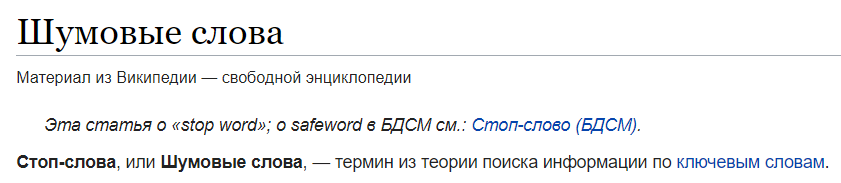

![image](https://steamusercontent-a.akamaihd.net/ugc/876378199807817031/F8A3F0381124D6FAD232F281CE5A563246C32385/ "chess")

### 4 Bag-of-words и TF-IDF

Но как же все-таки работать с текстами, используя стандартные методы машинного обучения? Нужна выборка!

Модель bag-of-words: текст можно представить как набор независимых слов. Тогда каждому слову можно сопоставить вес, таким образом, сопоставляя тексту набор весов. В качестве весов можно брать частоту встречаемости слов в тексте.

In [ ]:
texts = ['I like my cat.', 'My cat is the most perfect cat.', 'is this cat or is this bread?']

In [ ]:
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]
texts_tokenized

Как обычно, выручает `sklearn`:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(texts_tokenized)

In [ ]:
cnt_vec.get_feature_names()

In [ ]:
X

In [ ]:
X.toarray()

Заметим, что если слово часто встречается в одном тексте, но почти не встречается в других, то оно получает для данного текста большой вес, ровно так же, как и слова, которые часто встречаются в каждом тексте. Для того, чтобы разделять эти такие слова, можно использовать статистическую меру TF-IDF, характеризующую важность слова для конкретного текста. Для каждого слова из текста $d$ рассчитаем относительную частоту встречаемости в нем (Term Frequency):

$$
\text{TF}(t, d) = \frac{C(t)}{\sum\limits_{k \in d}C(k)},
$$

где $C(t)$ - число вхождений слова $t$ в текст $d$.

Также для каждого слова из текста $d$ рассчитаем обратную частоту встречаемости в корпусе текстов $D$ (Inverse Document Frequency):

$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$

Логарифмирование здесь проводится с целью уменьшить масштаб весов, ибо зачастую в корпусах присутствует очень много текстов.

В итоге каждому слову $t$ из текста $d$ теперь можно присвоить вес

$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$

Интерпретировать формулу выше несложно: действительно, чем чаще данное слово встречается в данном тексте и чем реже в остальных, тем важнее оно для этого текста.

А что там с практикой? `sklearn`, на помощь!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(texts_tokenized)

In [ ]:
tfidf_vec.get_feature_names()

In [ ]:
X

In [ ]:
X.toarray()

Что изменилось по сравнению с методом `CountVectorizer`? Интерпретируйте результат.

### 5 Практика

Вам предлагается решить задачу анализа тональности - построить модель, определяющую по отзыву о фильме, положительный он или отрицательный.

In [ ]:
import pandas as pd
data = pd.read_csv('movie_reviews.csv')

In [ ]:
# your code here